In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

In [39]:
df = pd.read_csv("/content/insurance.csv")

In [40]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [41]:
num_cols=df.select_dtypes(include=["number"]).columns
cat_cols=df.select_dtypes(include=["object"]).columns
num_cols = [col for col in num_cols if col != 'charges']
print("numerical columns are",num_cols)
print("categorical columns are",cat_cols)

numerical columns are ['age', 'bmi', 'children']
categorical columns are Index(['sex', 'smoker', 'region'], dtype='object')


In [42]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [43]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
lr_b = LinearRegression()
lr_b.fit(x_train, y_train)
lr_predictions= lr_b.predict(x_test)
r2_before_lr=r2_score(y_test, lr_predictions)
rf_b = RandomForestRegressor(n_estimators=300, random_state=42)
rf_b.fit(x_train, y_train)
rf_predictions= rf_b.predict(x_test)
r2_after_rf=r2_score(y_test, rf_predictions)

In [46]:

mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

In [47]:
selected_features = mi_series[mi_series > 0.06].index.tolist()

In [48]:
df_clean = df_encoded.copy()

In [49]:
for col in ['age', 'bmi', 'children']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [50]:
X_final = df_clean[selected_features]
y_final = df_clean["charges"]
x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [54]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_a_predictions= lr.predict(x_test)
r2_after_lr=r2_score(y_test, lr_a_predictions)
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)
rf_a_predictions= rf.predict(x_test)
r2_after_rf=r2_score(y_test, rf_a_predictions)

print("R^2 of Linear regression:",r2_before_lr)
print("Final R^2 value for Rnadom Forest:",r2_after_rf)

R^2 of Linear regression: 0.7696118054369011
Final R^2 value for Rnadom Forest: 0.8294473268265464


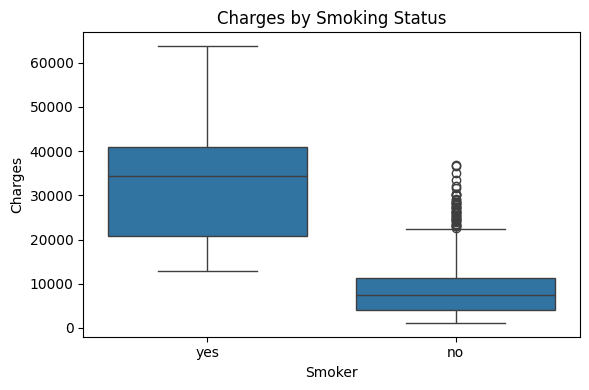

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

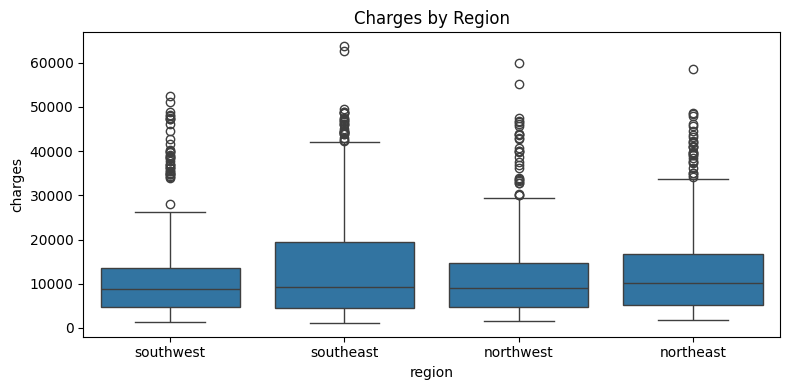

In [58]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.tight_layout()
plt.show()
